In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import os

In [55]:
directory = './Flowers'

In [56]:
os.listdir(directory)

['test', 'train']

In [57]:
train_path = directory+'\\train\\'
test_path = directory+'\\test\\'

In [58]:
os.listdir(train_path)

['Daisy', 'Dandelion', 'Rose', 'Sunflower', 'Tulip']

In [59]:
os.listdir(test_path)

['Daisy', 'Dandelion', 'Rose', 'Sunflower', 'Tulip']

In [60]:
os.listdir(train_path+'\\Dandelion\\')[0]

'10043234166_e6dd915111_n.jpg'

In [61]:
dandelion_path = train_path+'\\Dandelion\\'+'\\10043234166_e6dd915111_n.jpg\\'

In [62]:
dandelion_img = imread(dandelion_path)

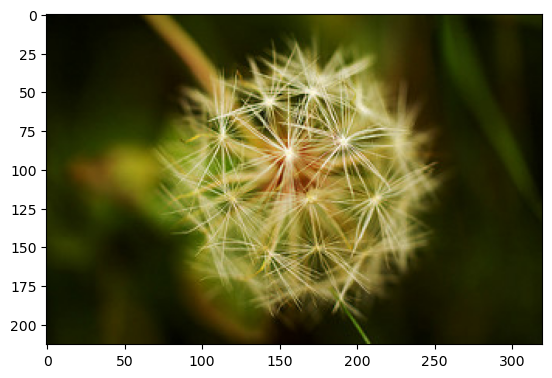

In [63]:
plt.imshow(dandelion_img)

In [64]:
dandelion_img.shape

(213, 320, 3)

In [65]:
len(os.listdir(train_path+'\\Dandelion\\'))

952

In [66]:
len(os.listdir(train_path+'\\Sunflower\\'))

634

In [67]:
len(os.listdir(train_path+'\\Daisy\\'))

669

In [68]:
len(os.listdir(train_path+'\\Rose\\'))

684

In [69]:
len(os.listdir(train_path+'\\Tulip\\'))

884

In [70]:
dim1 = []
dim2 = []
for img_file in os.listdir(train_path+'\\Dandelion\\'):
    img = imread(train_path+'\\Dandelion\\'+img_file)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

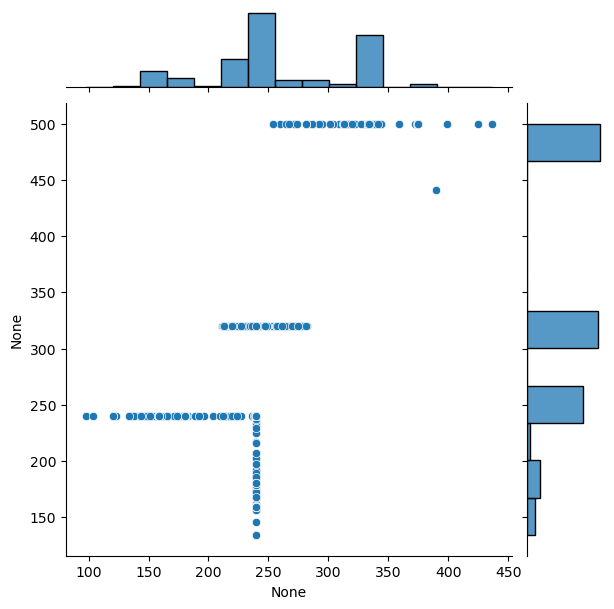

In [71]:
sns.jointplot(x=dim1, y=dim2)

In [72]:
np.mean(dim1)

255.85294117647058

In [73]:
np.mean(dim2)

344.24789915966386

In [74]:
dim1 = []
dim2 = []
for img_file in os.listdir(train_path+'\\Sunflower\\'):
    img = imread(train_path+'\\Sunflower\\'+img_file)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

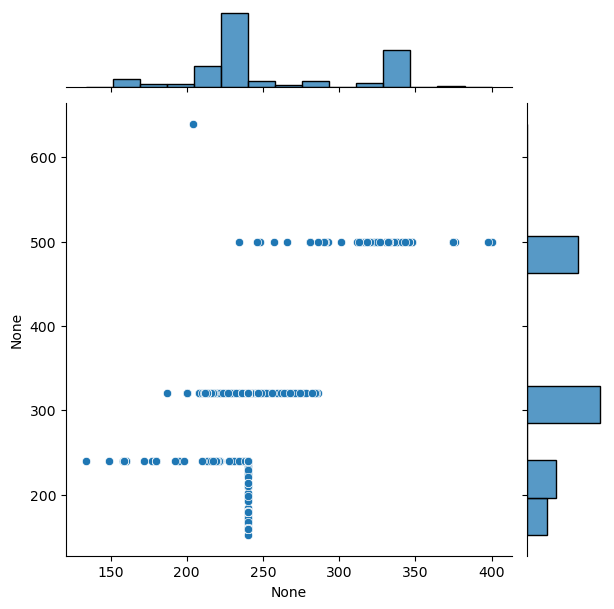

In [75]:
sns.jointplot(x=dim1, y=dim2)

In [76]:
dim1 = []
dim2 = []
for img_file in os.listdir(train_path+'\\Daisy\\'):
    img = imread(train_path+'\\Daisy\\'+img_file)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

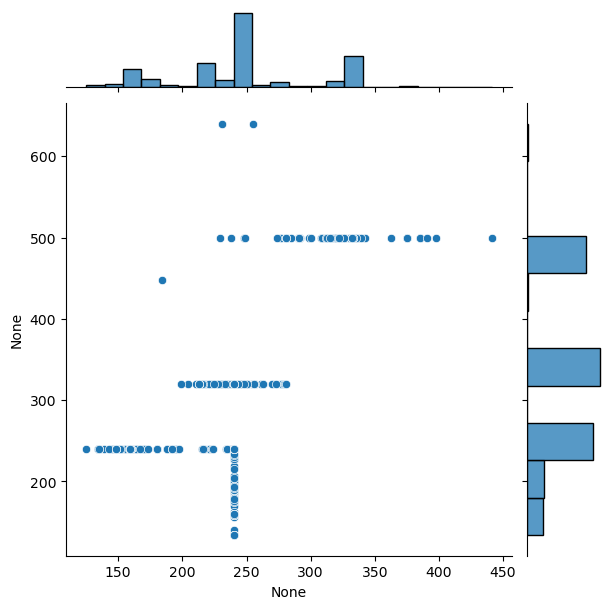

In [77]:
sns.jointplot(x=dim1, y=dim2)

In [78]:
dim1 = []
dim2 = []
for img_file in os.listdir(train_path+'\\Rose\\'):
    img = imread(train_path+'\\Rose\\'+img_file)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

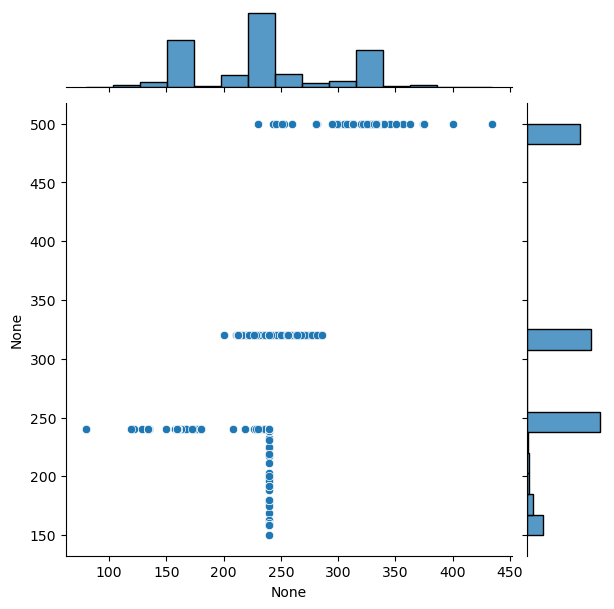

In [79]:
sns.jointplot(x=dim1, y=dim2)

In [80]:
dim1 = []
dim2 = []
for img_file in os.listdir(train_path+'\\Tulip\\'):
    img = imread(train_path+'\\Tulip\\'+img_file)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

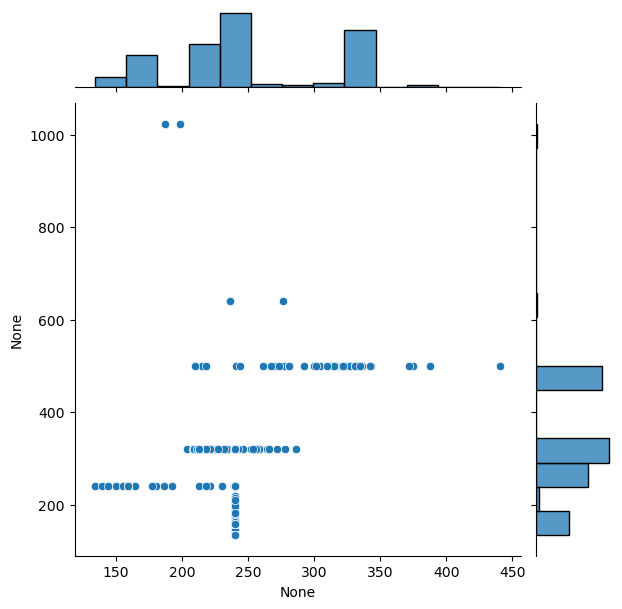

In [81]:
sns.jointplot(x=dim1, y=dim2)

In [82]:
img_shape = (250, 335, 3)

In [83]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [84]:
help(ImageDataGenerator)

Help on class ImageDataGenerator in module keras.src.legacy.preprocessing.image:

class ImageDataGenerator(builtins.object)
 |  ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, interpolation_order=1, dtype=None)
 |
 |  DEPRECATED.
 |
 |  Methods defined here:
 |
 |  __init__(self, featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=

In [86]:
img_gen = ImageDataGenerator(rotation_range=20,
                            width_shift_range=0.10,
                            height_shift_range=0.10,
                            rescale=1/255,
                            shear_range=0.1,
                            zoom_range=0.1,
                            horizontal_flip=True,
                            fill_mode='nearest')

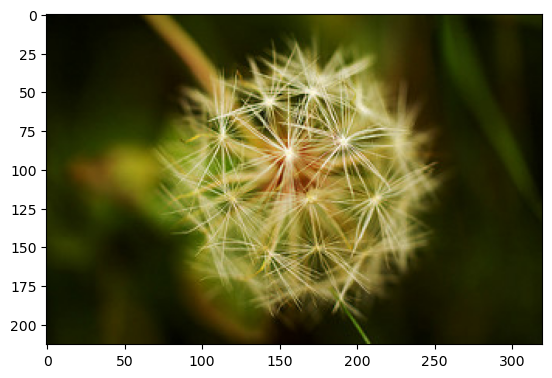

In [88]:
plt.imshow(dandelion_img)

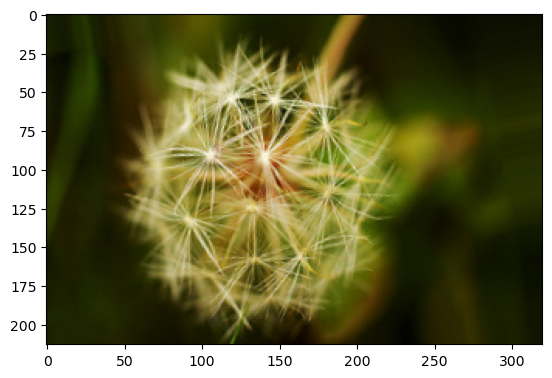

In [93]:
plt.imshow(img_gen.random_transform(dandelion_img))

In [94]:
img_gen.flow_from_directory(train_path)

Found 3823 images belonging to 5 classes.


In [95]:
img_gen.flow_from_directory(test_path)

Found 500 images belonging to 5 classes.


In [100]:
batch_size = 16

In [101]:
train_img_gen = img_gen.flow_from_directory(train_path, 
                                           target_size=img_shape[:2],
                                           color_mode='rgb',
                                           batch_size=batch_size,
                                           class_mode='categorical')

Found 3823 images belonging to 5 classes.


In [102]:
test_img_gen = img_gen.flow_from_directory(test_path, 
                                           target_size=img_shape[:2],
                                           color_mode='rgb',
                                           batch_size=batch_size,
                                           class_mode='categorical',shuffle=False)

Found 500 images belonging to 5 classes.


In [104]:
train_img_gen.class_indices

{'Daisy': 0, 'Dandelion': 1, 'Rose': 2, 'Sunflower': 3, 'Tulip': 4}

In [105]:
test_img_gen.class_indices

{'Daisy': 0, 'Dandelion': 1, 'Rose': 2, 'Sunflower': 3, 'Tulip': 4}

In [106]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D

In [109]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=img_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=img_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=img_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(5,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [110]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 248, 333, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 124, 166, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 122, 164, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 61, 82, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 59, 80, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 29, 40, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 74240)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       9,502,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,559,813 (36.47 MB)

 Trainable params: 9,559,813 (36.47 MB)

 Non-trainable params: 0 (0.00 B)

In [111]:
from tensorflow.keras.callbacks import EarlyStopping

In [112]:
early_stop = EarlyStopping(monitor='val_loss',verbose=1, patience=25) #EarlyStopping technique 

In [115]:
import warnings
warnings.filterwarnings('ignore')

In [117]:
results = model.fit(train_img_gen, 
                             epochs=5,
                             validation_data=test_img_gen,
                             callbacks=[early_stop])

Epoch 1/5
239/239 ━━━━━━━━━━━━━━━━━━━━ 394s 2s/step - accuracy: 0.3529 - loss: 1.5232 - val_accuracy: 0.4440 - val_loss: 1.1580
Epoch 2/5
239/239 ━━━━━━━━━━━━━━━━━━━━ 372s 2s/step - accuracy: 0.4867 - loss: 1.2047 - val_accuracy: 0.5800 - val_loss: 1.0276
Epoch 3/5
239/239 ━━━━━━━━━━━━━━━━━━━━ 369s 2s/step - accuracy: 0.5716 - loss: 1.0911 - val_accuracy: 0.6380 - val_loss: 0.9386
Epoch 4/5
239/239 ━━━━━━━━━━━━━━━━━━━━ 345s 1s/step - accuracy: 0.6024 - loss: 1.0310 - val_accuracy: 0.6040 - val_loss: 0.9741
Epoch 5/5
239/239 ━━━━━━━━━━━━━━━━━━━━ 346s 1s/step - accuracy: 0.6141 - loss: 0.9654 - val_accuracy: 0.6820 - val_loss: 0.8777


In [119]:
from tensorflow.keras.models import load_model
model.save('CNN_Flowers_Model.keras')

In [120]:
losses = pd.DataFrame(model.history.history)

<Axes: >

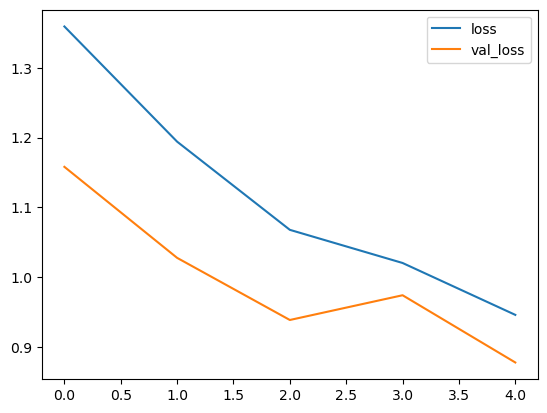

In [121]:
losses[['loss','val_loss']].plot()

<Axes: >

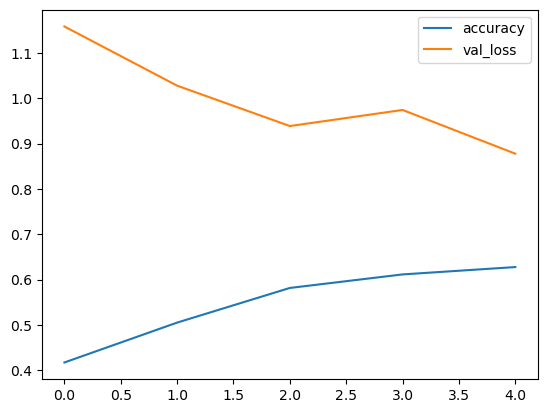

In [122]:
losses[['accuracy','val_loss']].plot()

In [123]:
model.metrics_names

['loss', 'compile_metrics']

In [125]:
model.evaluate(test_img_gen)

32/32 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.6022 - loss: 1.0047


[0.8874658942222595, 0.6579999923706055]

In [126]:
pred_probabilities = model.predict(test_img_gen)

32/32 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step


In [127]:
pred_probabilities

array([[1.9002977e-01, 4.1882411e-01, 7.6847278e-02, 2.2167103e-01,
        9.2627883e-02],
       [6.7951405e-01, 4.0173746e-04, 1.5491319e-01, 3.3516828e-03,
        1.6181934e-01],
       [1.5476346e-01, 5.4281715e-02, 3.1743142e-01, 7.9225563e-02,
        3.9429790e-01],
       ...,
       [4.4096387e-06, 2.9682156e-11, 5.8484226e-02, 3.2222307e-08,
        9.4151145e-01],
       [1.8067326e-03, 1.0606424e-06, 9.9844255e-02, 2.2550819e-04,
        8.9812249e-01],
       [2.0167229e-03, 2.5905994e-05, 7.3844478e-02, 6.3124864e-04,
        9.2348176e-01]], dtype=float32)

In [128]:
test_img_gen.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,

In [129]:
predictions = model.predict(test_img_gen)

32/32 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step


In [130]:
predictions

array([[1.7843479e-01, 3.8107041e-01, 7.5653397e-02, 2.7068472e-01,
        9.4156727e-02],
       [8.9622563e-01, 9.5595962e-05, 5.7647027e-02, 3.0596694e-04,
        4.5725755e-02],
       [1.5574156e-01, 1.2069702e-01, 2.8652287e-01, 1.0114564e-01,
        3.3589301e-01],
       ...,
       [2.9321791e-05, 1.5210810e-09, 7.6242492e-02, 6.7460928e-07,
        9.2372751e-01],
       [6.7063601e-04, 9.1146688e-07, 6.7511082e-02, 3.2964855e-04,
        9.3148774e-01],
       [3.3247162e-04, 7.1941349e-07, 8.9619651e-02, 8.7790620e-05,
        9.0995938e-01]], dtype=float32)

In [131]:
from sklearn.metrics import classification_report,confusion_matrix

In [137]:
predicted_classes = np.argmax(predictions, axis=-1)
cm = confusion_matrix(test_img_gen.classes, predicted_classes)

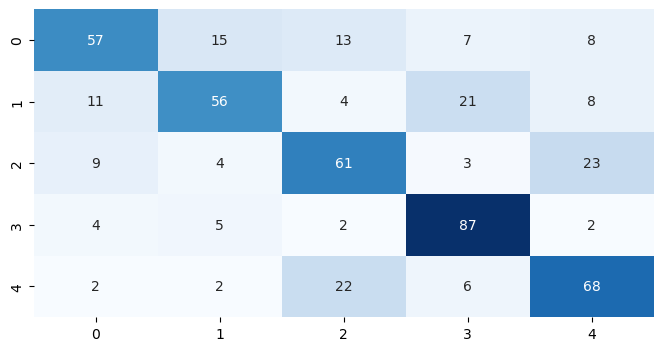

In [138]:
plt.figure(figsize=(8, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.show()

In [143]:
new_img_path = train_path+'\\Sunflower\\'+os.listdir(train_path+'\\Sunflower\\')[22]

In [144]:
from tensorflow.keras.preprocessing import image

In [145]:
new_img = image.load_img(new_img_path,target_size=img_shape)

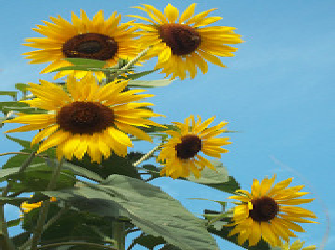

In [146]:
new_img

In [147]:
type(new_img)

PIL.Image.Image

In [149]:
new_img = image.img_to_array(new_img)

In [150]:
type(new_img)

numpy.ndarray

In [151]:
new_img.shape

(250, 335, 3)

In [152]:
new_img = np.expand_dims(new_img,axis=0)

In [153]:
new_img.shape

(1, 250, 335, 3)

In [154]:
model.predict(new_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([[0., 0., 0., 1., 0.]], dtype=float32)

In [155]:
test_img_gen.class_indices

{'Daisy': 0, 'Dandelion': 1, 'Rose': 2, 'Sunflower': 3, 'Tulip': 4}